In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os
from sklearn.metrics import precision_score,accuracy_score,recall_score,mean_squared_error,confusion_matrix,classification_report,roc_auc_score,f1_score
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder
from sklearn import model_selection
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import logging
import warnings
from scipy import stats
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE


In [2]:
os.chdir('C:\\Users\\HP\\Downloads\\Hackathon')

In [3]:
pd.options.display.max_columns=300


In [4]:
df=pd.read_csv('train.csv')

In [5]:
df.shape

(105000, 34)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105000 entries, 0 to 104999
Data columns (total 34 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ID                  105000 non-null  int64  
 1   year_of_poll        105000 non-null  int64  
 2   own_self_emp        105000 non-null  int64  
 3   veteran benefits    105000 non-null  int64  
 4   currently_enrolled  73557 non-null   object 
 5   race                105000 non-null  object 
 6   father_country      105000 non-null  object 
 7   educ                105000 non-null  object 
 8   house_stat          104989 non-null  object 
 9   major_ind_code      105000 non-null  object 
 10  labour_union        69669 non-null   object 
 11  self_country        105000 non-null  object 
 12  major_occ_code      51945 non-null   object 
 13  age                 105000 non-null  int64  
 14  mother_country      105000 non-null  object 
 15  house_summary       105000 non-nul

In [7]:
df.head(5)

,ID,year_of_poll,own_self_emp,veteran benefits,currently_enrolled,race,father_country,educ,house_stat,major_ind_code,labour_union,self_country,major_occ_code,age,mother_country,house_summary,gender,hisp_origin,gains,dividends,marriage_status,losses,employer_of,house_1yr_ago,income_filled,weeks_worked,under18,hourly_wage,unemp_reason,citizenship,woker_type,fed_liability,full_partime_job,income
0,0,2004,0,2,High school,White,United-States,Associates degree-academic program,Householder,Business and repair services,no,United-States,Protective services,42,United-States,Householder,M,All_Other,0.0,0.0,Married_civilian_Sp_Pr,0.0,1,No,No,47,NaN,0.0,NaN,NB_US,Pvt,Joint_both_under65,Children/Armed_Forces,More than 50K $
1,1,2005,0,0,College/University,White,Japan,Children,Child <18 never marr not in subfamily,Not in universe or children,NaN,United-States,NaN,10,United-States,Child_U18_Unmarried,M,Mex_Amer,0.0,0.0,Unmarried,0.0,0,NaN,No,0,Both_Pr,0.0,NaN,NB_US,NaN,Nonfiler,Children/Armed_Forces,More than 50K $
2,2,2004,0,2,NaN,White,United-States,Some college but no degree,Secondary individual,Manufacturing-durable goods,NaN,United-States,Machine operators assmblrs & inspctrs,46,United-States,Non_Relative,M,All_Other,0.0,0.0,Divorced,0.0,6,No,Yes,47,NaN,0.0,NaN,NB_US,Pvt,Single,Children/Armed_Forces,More than 50K $
3,3,2004,0,2,College/University,Amer/Indian/Aleut/Eskimo,United-States,High school graduate,Householder,Wholesale trade,no,United-States,Handlers equip cleaners etc,35,United-States,Householder,M,All_Other,0.0,0.0,Married_civilian_Sp_Pr,0.0,2,Yes,NaN,47,NaN,0.0,NaN,NB_US,Pvt,Joint_both_under65,Children/Armed_Forces,More than 50K $
4,4,2004,0,2,NaN,White,United-States,High school graduate,Householder,Wholesale trade,no,United-States,Executive admin and managerial,61,United-States,Householder,F,All_Other,0.0,0.0,Divorced,0.0,3,Yes,NaN,47,NaN,0.0,NaN,NB_US,Pvt,Single,Children/Armed_Forces,More than 50K $


<AxesSubplot:xlabel='gender', ylabel='count'>

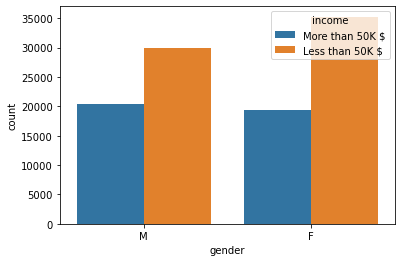

In [8]:
#fg,ax=plt.subplots(3,2,figsize=(18,12))
sns.countplot( x='gender',hue='income',data=df)



<AxesSubplot:xlabel='race', ylabel='count'>

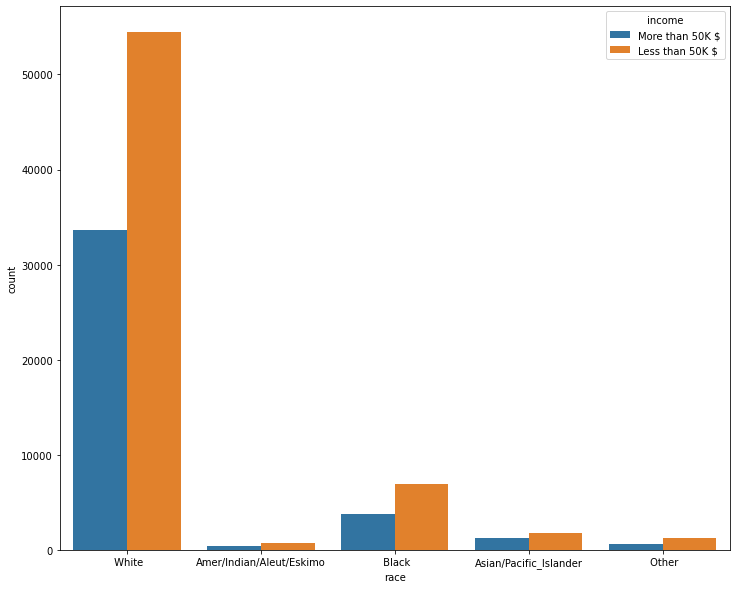

In [9]:
plt.subplots(figsize=(12,10))
sns.countplot( x='race',hue='income',data=df)


<AxesSubplot:xlabel='count', ylabel='father_country'>

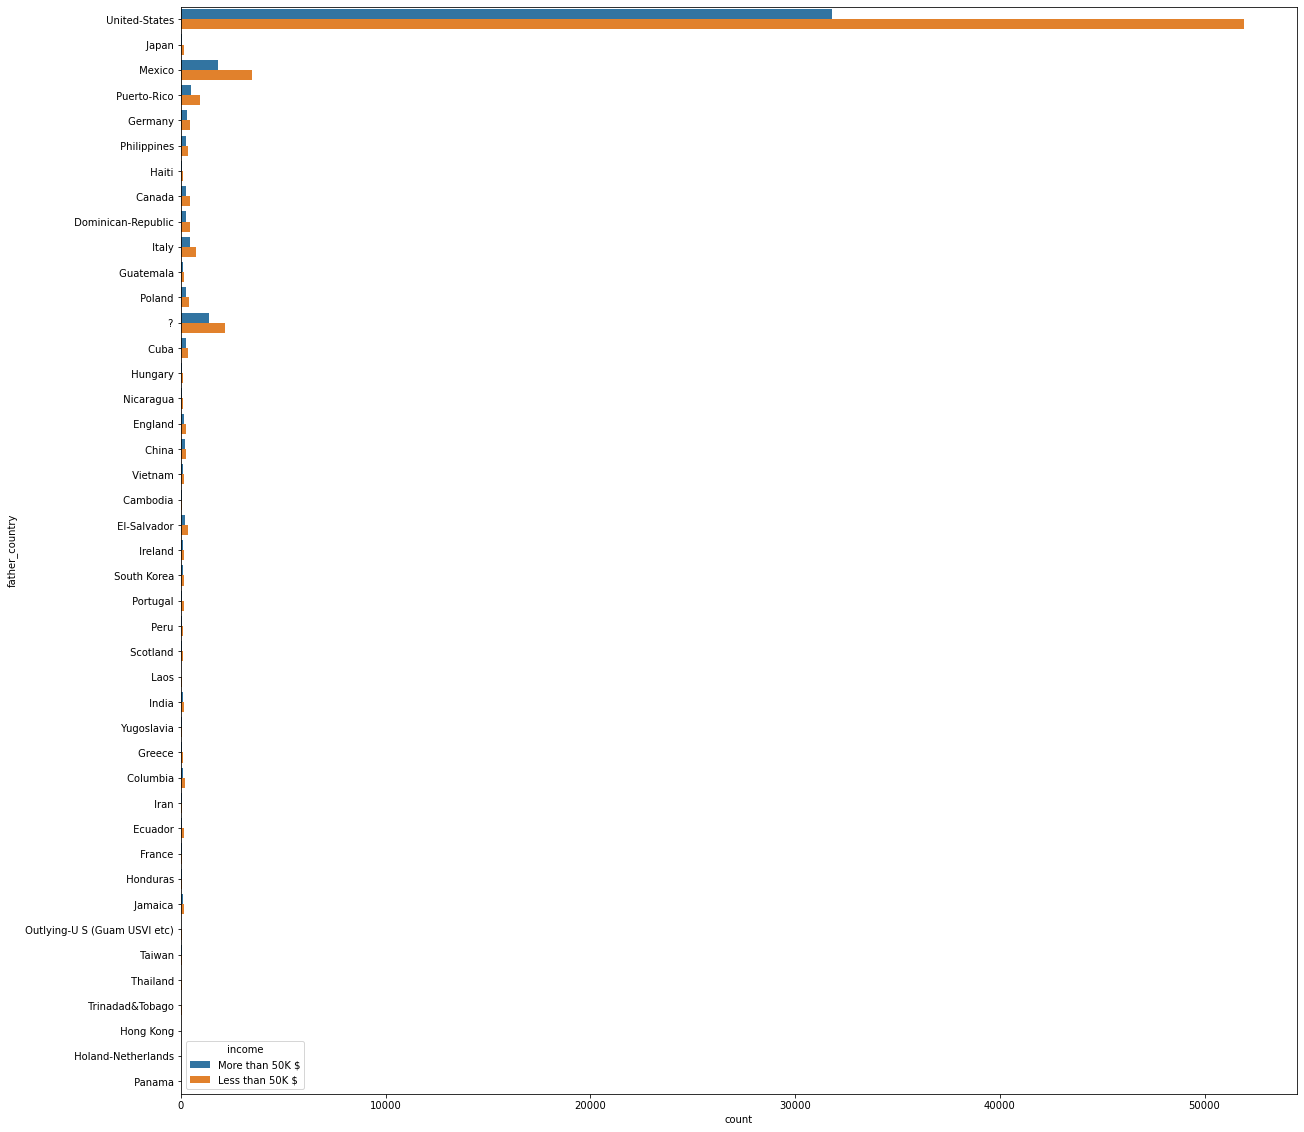

In [10]:
plt.subplots(figsize=(20,20))
sns.countplot( y='father_country',hue='income',data=df)


<AxesSubplot:xlabel='count', ylabel='major_ind_code'>

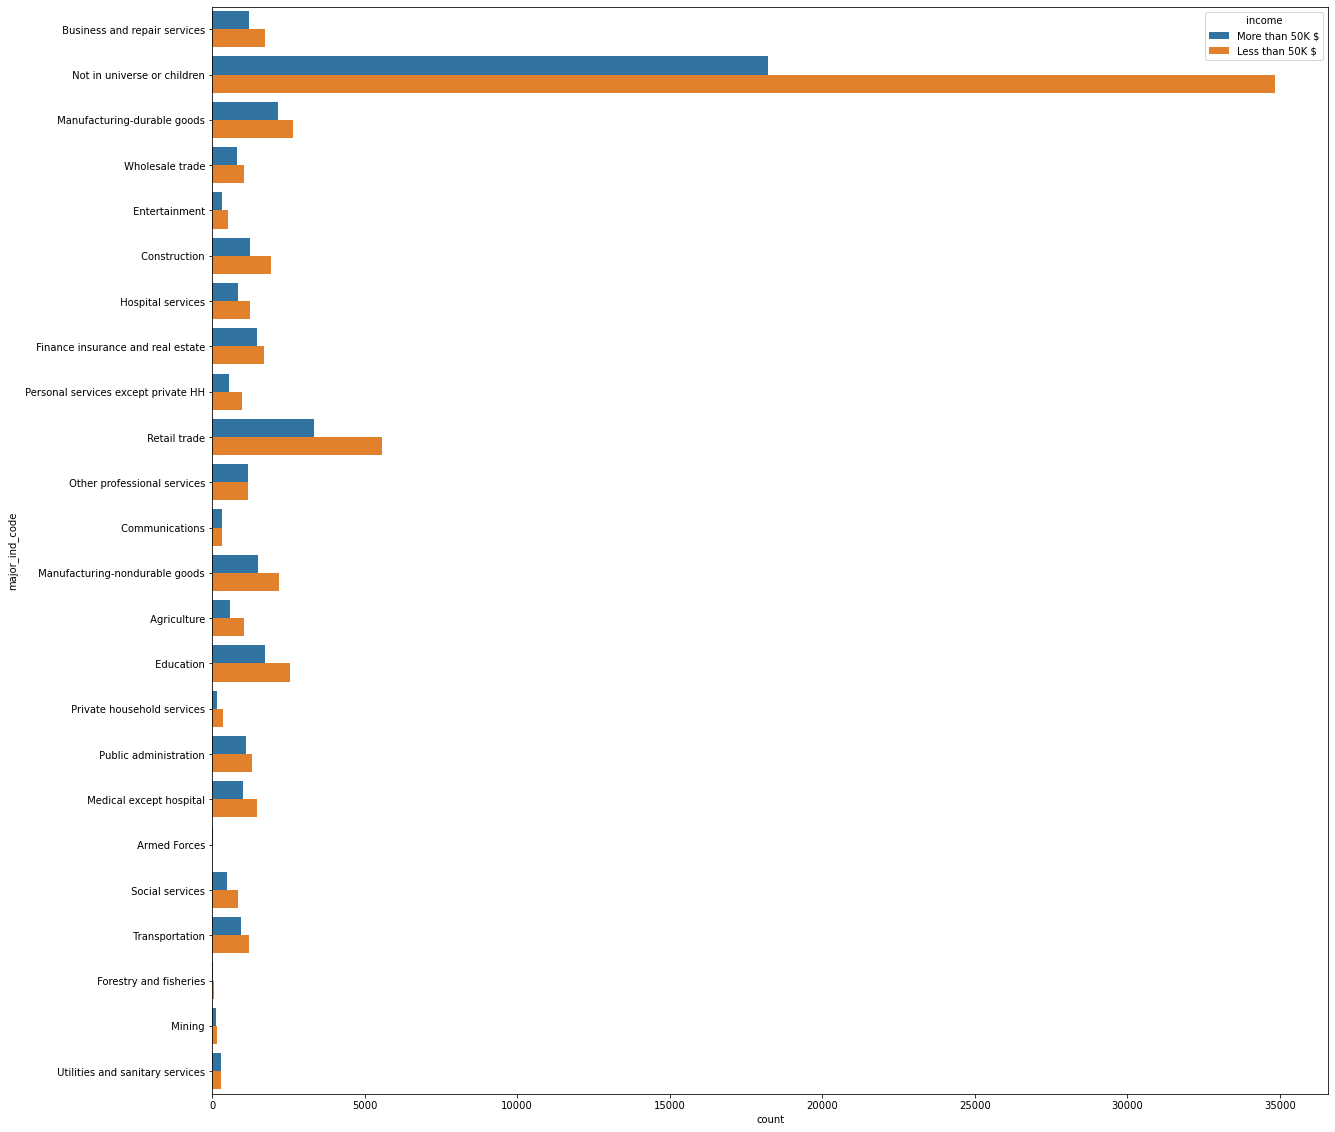

In [11]:
plt.subplots(figsize=(20,20))

sns.countplot( y='major_ind_code',hue='income',data=df)

<AxesSubplot:xlabel='count', ylabel='educ'>

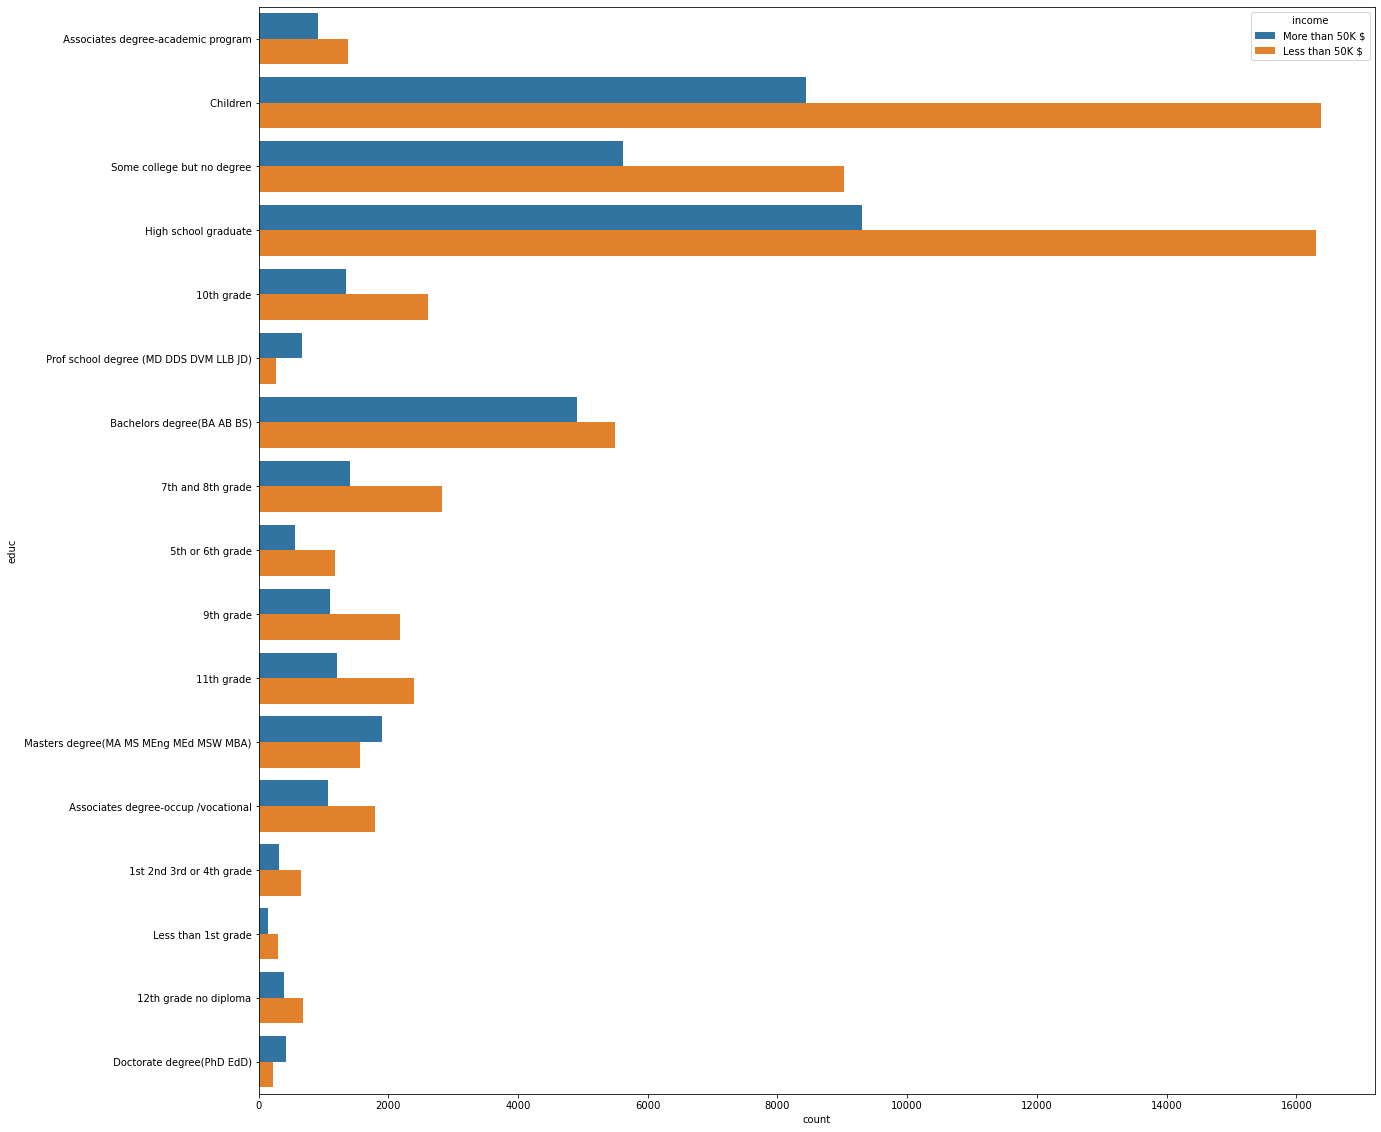

In [12]:
plt.subplots(figsize=(20,20))

sns.countplot( y='educ',hue='income',data=df)

<AxesSubplot:xlabel='count', ylabel='full_partime_job'>

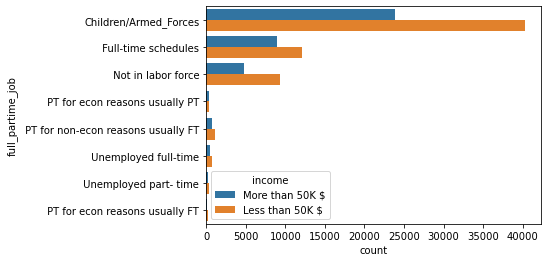

In [13]:
#plt.subplots(figsize=(12,20))

sns.countplot( y='full_partime_job',hue='income',data=df)

<AxesSubplot:xlabel='count', ylabel='citizenship'>

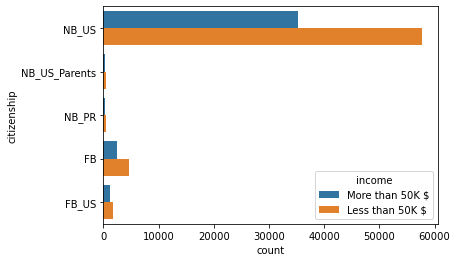

In [14]:
sns.countplot( y='citizenship',hue='income',data=df)

<AxesSubplot:xlabel='count', ylabel='marriage_status'>

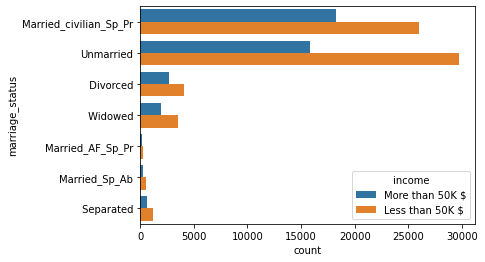

In [15]:
sns.countplot( y='marriage_status',hue='income',data=df)


<AxesSubplot:xlabel='count', ylabel='major_ind_code'>

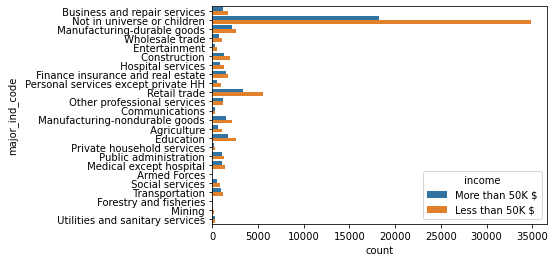

In [16]:
sns.countplot( y='major_ind_code',hue='income',data=df)
	

<AxesSubplot:xlabel='count', ylabel='currently_enrolled'>

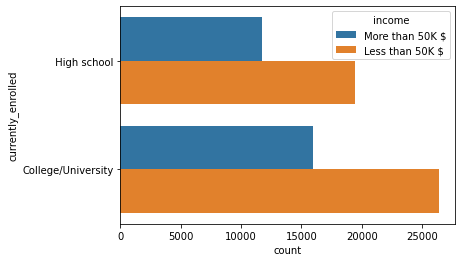

In [17]:
sns.countplot( y='currently_enrolled',hue='income',data=df)

<AxesSubplot:xlabel='gains', ylabel='Density'>

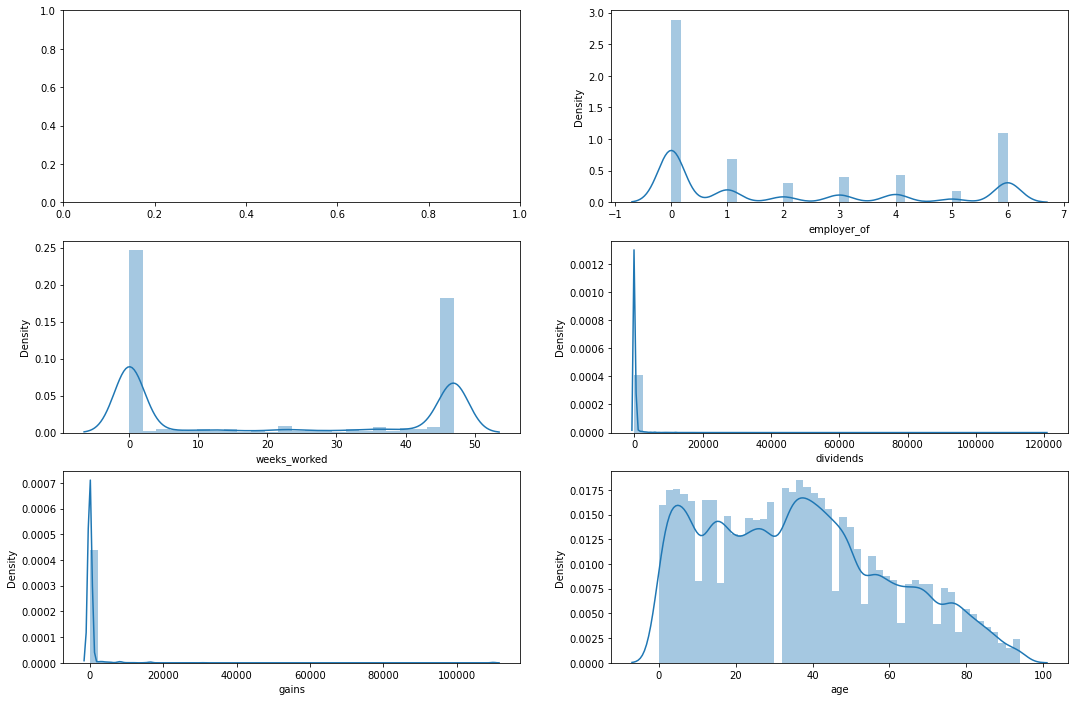

In [18]:
fg,ax=plt.subplots(3,2,figsize=(18,12))


sns.distplot(df['weeks_worked'],ax=ax[1,0])
sns.distplot(df['employer_of'],ax=ax[0,1])
sns.distplot(df['dividends'],ax=ax[1,1])
sns.distplot(df['age'],ax=ax[2,1])
sns.distplot(df['gains'],ax=ax[2,0])

<AxesSubplot:xlabel='hourly_wage', ylabel='Count'>

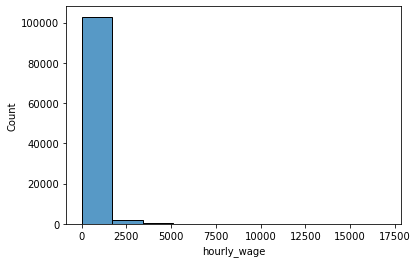

In [19]:
sns.histplot(df['hourly_wage'],bins=10)

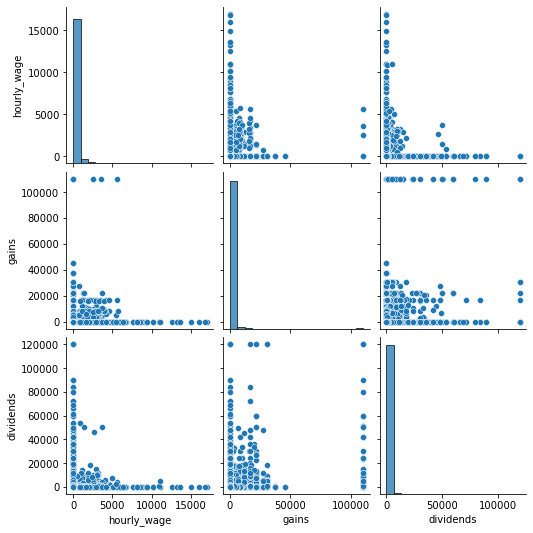

In [20]:
sns.pairplot(df[['hourly_wage', 'gains', 'dividends']]);

In [21]:
df.isnull().sum()

ID                         0
year_of_poll               0
own_self_emp               0
veteran benefits           0
currently_enrolled     31443
race                       0
father_country             0
educ                       0
house_stat                11
major_ind_code             0
labour_union           35331
self_country               0
major_occ_code         53055
age                        0
mother_country             0
house_summary              0
gender                     0
hisp_origin                0
gains                      0
dividends                  0
marriage_status            0
losses                     0
employer_of                0
house_1yr_ago          53322
income_filled          32403
weeks_worked               0
under18                76016
hourly_wage                0
unemp_reason          101811
citizenship                0
woker_type             52835
fed_liability              0
full_partime_job        1392
income                     0
dtype: int64

In [22]:
df[df.age==0]['full_partime_job'].value_counts()

Children/Armed_Forces    1483
Name: full_partime_job, dtype: int64

In [23]:
df[df['father_country'].str.strip()=="?"]

,ID,year_of_poll,own_self_emp,veteran benefits,currently_enrolled,race,father_country,educ,house_stat,major_ind_code,labour_union,self_country,major_occ_code,age,mother_country,house_summary,gender,hisp_origin,gains,dividends,marriage_status,losses,employer_of,house_1yr_ago,income_filled,weeks_worked,under18,hourly_wage,unemp_reason,citizenship,woker_type,fed_liability,full_partime_job,income
49,49,2005,0,2,College/University,White,?,Some college but no degree,Spouse of householder,Not in universe or children,NaN,United-States,NaN,78,?,Spouse,F,All_Other,0.0,0.0,Married_civilian_Sp_Pr,0.0,0,NaN,NaN,0,NaN,0.0,NaN,NB_US,NaN,Joint_both_Above65,Not in labor force,More than 50K $
84,84,2005,0,2,High school,White,?,11th grade,Child 18+ never marr Not in a subfamily,Entertainment,NaN,United-States,Professional specialty,19,?,Child_Above18,F,Central/South_American,0.0,0.0,Unmarried,0.0,2,NaN,NaN,11,NaN,0.0,NaN,NB_US,Pvt,Single,Full-time schedules,More than 50K $
107,107,2005,0,2,NaN,White,?,Some college but no degree,Spouse of householder,Hospital services,no,United-States,Adm support including clerical,66,?,Spouse,F,All_Other,0.0,0.0,Married_civilian_Sp_Pr,0.0,6,NaN,No,47,NaN,0.0,NaN,NB_US,Pvt,Joint_one_Under65_one_Above65,Full-time schedules,More than 50K $
114,114,2004,0,0,College/University,White,?,Children,Child <18 never marr not in subfamily,Not in universe or children,NaN,United-States,NaN,12,United-States,Child_U18_Unmarried,F,All_Other,0.0,0.0,Unmarried,0.0,0,Yes,NaN,0,Both_Pr,0.0,NaN,NB_US,NaN,Nonfiler,Children/Armed_Forces,More than 50K $
132,132,2005,0,0,NaN,White,?,Children,Child <18 never marr not in subfamily,Not in universe or children,no,?,NaN,12,?,Child_U18_Unmarried,F,All_Other,0.0,0.0,Unmarried,0.0,0,NaN,NaN,0,Both_Pr,0.0,NaN,FB,NaN,Nonfiler,Children/Armed_Forces,More than 50K $
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104922,104922,2004,0,2,High school,Asian/Pacific_Islander,?,9th grade,Child <18 never marr not in subfamily,Not in universe or children,no,?,NaN,17,?,Child_U18_Unmarried,F,All_Other,0.0,0.0,Unmarried,0.0,0,Yes,No,0,Both_Pr,0.0,NaN,FB,NaN,Nonfiler,Children/Armed_Forces,More than 50K $
104953,104953,2004,0,2,NaN,White,?,Masters degree(MA MS MEng MEd MSW MBA),Spouse of householder,Business and repair services,NaN,United-States,Professional specialty,61,?,Spouse,M,All_Other,0.0,1200.0,Married_civilian_Sp_Pr,0.0,1,Yes,Yes,47,NaN,0.0,NaN,NB_US,Pvt,Joint_both_under65,Children/Armed_Forces,More than 50K $
104957,104957,2004,0,2,NaN,White,?,5th or 6th grade,Nonfamily householder,Not in universe or children,NaN,United-States,NaN,90,?,Householder,M,All_Other,0.0,0.0,Unmarried,0.0,0,Yes,NaN,0,NaN,0.0,NaN,NB_US,NaN,Single,Children/Armed_Forces,More than 50K $
104969,104969,2005,0,2,College/University,Asian/Pacific_Islander,?,High school graduate,Householder,Manufacturing-durable goods,no,?,Machine operators assmblrs & inspctrs,46,?,Householder,M,All_Other,0.0,0.0,Married_civilian_Sp_Pr,0.0,6,NaN,No,47,NaN,0.0,NaN,FB,Pvt,Joint_both_under65,Full-time schedules,More than 50K $


In [24]:
Allcols=df.columns
Allcols

Index(['ID', 'year_of_poll', 'own_self_emp', 'veteran benefits',
       'currently_enrolled', 'race', 'father_country', 'educ', 'house_stat',
       'major_ind_code', 'labour_union', 'self_country', 'major_occ_code',
       'age', 'mother_country', 'house_summary', 'gender', 'hisp_origin',
       'gains', 'dividends', 'marriage_status', 'losses', 'employer_of',
       'house_1yr_ago', 'income_filled', 'weeks_worked', 'under18',
       'hourly_wage', 'unemp_reason', 'citizenship', 'woker_type',
       'fed_liability', 'full_partime_job', 'income'],
      dtype='object')

In [25]:
numericalcols=['age','own_self_emp','veteran benefits','gains', 'dividends','losses','employer_of','weeks_worked','hourly_wage']

In [26]:
categoricalcols=Allcols.drop(numericalcols)

In [27]:
categoricalcols=categoricalcols.drop(['ID','year_of_poll','income'])

In [28]:
categoricalcols

Index(['currently_enrolled', 'race', 'father_country', 'educ', 'house_stat',
       'major_ind_code', 'labour_union', 'self_country', 'major_occ_code',
       'mother_country', 'house_summary', 'gender', 'hisp_origin',
       'marriage_status', 'house_1yr_ago', 'income_filled', 'under18',
       'unemp_reason', 'citizenship', 'woker_type', 'fed_liability',
       'full_partime_job'],
      dtype='object')

In [29]:
for col in categoricalcols:
    print(df[col].unique())

[' High school' 'College/University' nan]
[' White' 'Amer/Indian/Aleut/Eskimo' ' Black' 'Asian/Pacific_Islander'
 ' Other']
[' United-States' ' Japan' ' Mexico' ' Puerto-Rico' ' Germany'
 ' Philippines' ' Haiti' ' Canada' ' Dominican-Republic' ' Italy'
 ' Guatemala' ' Poland' ' ?' ' Cuba' ' Hungary' ' Nicaragua' ' England'
 ' China' ' Vietnam' ' Cambodia' ' El-Salvador' ' Ireland' ' South Korea'
 ' Portugal' ' Peru' ' Scotland' ' Laos' ' India' ' Yugoslavia' ' Greece'
 ' Columbia' ' Iran' ' Ecuador' ' France' ' Honduras' ' Jamaica'
 ' Outlying-U S (Guam USVI etc)' ' Taiwan' ' Thailand' ' Trinadad&Tobago'
 ' Hong Kong' ' Holand-Netherlands' ' Panama']
[' Associates degree-academic program' ' Children'
 ' Some college but no degree' ' High school graduate' ' 10th grade'
 ' Prof school degree (MD DDS DVM LLB JD)' ' Bachelors degree(BA AB BS)'
 ' 7th and 8th grade' ' 5th or 6th grade' ' 9th grade' ' 11th grade'
 ' Masters degree(MA MS MEng MEd MSW MBA)'
 ' Associates degree-occup /vocation

In [30]:
for col in categoricalcols:
    df[col]=df[col].str.replace('+','plus')
    df[col]=df[col].str.replace('<','less')
    df[col]=df[col].str.replace('(','')
    df[col]=df[col].str.replace(')','')

In [31]:
for col in categoricalcols:
    print(df[col].unique())

[' High school' 'College/University' nan]
[' White' 'Amer/Indian/Aleut/Eskimo' ' Black' 'Asian/Pacific_Islander'
 ' Other']
[' United-States' ' Japan' ' Mexico' ' Puerto-Rico' ' Germany'
 ' Philippines' ' Haiti' ' Canada' ' Dominican-Republic' ' Italy'
 ' Guatemala' ' Poland' ' ?' ' Cuba' ' Hungary' ' Nicaragua' ' England'
 ' China' ' Vietnam' ' Cambodia' ' El-Salvador' ' Ireland' ' South Korea'
 ' Portugal' ' Peru' ' Scotland' ' Laos' ' India' ' Yugoslavia' ' Greece'
 ' Columbia' ' Iran' ' Ecuador' ' France' ' Honduras' ' Jamaica'
 ' Outlying-U S Guam USVI etc' ' Taiwan' ' Thailand' ' Trinadad&Tobago'
 ' Hong Kong' ' Holand-Netherlands' ' Panama']
[' Associates degree-academic program' ' Children'
 ' Some college but no degree' ' High school graduate' ' 10th grade'
 ' Prof school degree MD DDS DVM LLB JD' ' Bachelors degreeBA AB BS'
 ' 7th and 8th grade' ' 5th or 6th grade' ' 9th grade' ' 11th grade'
 ' Masters degreeMA MS MEng MEd MSW MBA'
 ' Associates degree-occup /vocational' ' 1s

In [32]:
def removeNull(data):
    #check for empty or null values
    data=data.replace(' ?', np.NaN)
    
    data=data.replace(r'^\s*$', np.NaN, regex=True)
    if data.isnull().sum().sum()>0:
        print('Number of null values: ',data.isnull().sum().sum())
        #If number of null values is less than 1% of whole data then drop the rows
        #else replace with median
        if ((data.isnull().sum().sum()/len(data)) * 100)<1: 
                print("Removing the data with null values")
                data=data.dropna()
        else:
                print("Replacing the data with null values")
                
                for index, value in data.dtypes.items(): 
                    if value == 'object':
                        data[index] = data[index].fillna('')
                    else:
                        median_value=data[index].median()
                        data[index] = data[index].fillna(median_value)
    return(data)


In [33]:
df['own_self_emp']=df['own_self_emp'].astype('object')
df['veteran benefits']=df['veteran benefits'].astype('object')


In [34]:
def convertCategoryfeature(data):
    for col in data.columns:
        if data[col].dtype.name=='object' :
            data[col]=pd.Categorical(data[col])

    return data

In [35]:
minmax=MinMaxScaler()

def normalizeData(xtraindata,xtestdata):
    x_trainData=pd.DataFrame(minmax.fit_transform(xtraindata))
    x_trainData.columns=xtraindata.columns
    x_testData=pd.DataFrame(minmax.fit_transform(xtestdata))
    x_testData.columns=xtestdata.columns
    return(x_trainData,x_testData)


In [36]:
from sklearn.preprocessing import OneHotEncoder
oe=OneHotEncoder()

def OnehotEncoding(data):
   # data=data.apply(le.fit_transform)
  #  data=oe.fit_transform(data)
    data=pd.get_dummies(data,drop_first=True)
    return data

In [37]:
def preprocessing_data(data):
    #Remove null values
    data=removeNull(data)
   
    #convert all object features as categorical
    data=convertCategoryfeature(data)
    #Drop customer ID as it is not required
    data=data.drop(['ID','year_of_poll'],axis=1)
    #encode categorical features
   # data1=data.drop(['target'],axis=1)

    data=OnehotEncoding(data)
    
   # data=remove_outliers(data)
    return data

In [38]:
def balanceData(x,y):
    oversample = SMOTE()
    print('Smote')
    x, y = oversample.fit_resample(x, y)
    return (x,y)


In [39]:
def prepare_data(data):
    X=pd.DataFrame(data.drop(targetcolumn,axis=1))
    y=pd.DataFrame(data[targetcolumn])
    #Feature selection
    #Select top 20 features based on importance score
   # print('Selecting feature based on importance score')
    #feature_imp=feature_selection(X,y)
    #feature_imp.reset_index(level=0, inplace=True)
    #feature_imp=feature_imp.head(200)
    #col=feature_imp['index']
    #feature_cols=[]
    #for i in col:
     #   feature_cols.append(i)
   
    #X=X[feature_cols]
    #print('Selected feature columns: ',X.columns)
  
    #Balance data
    X,y=balanceData(X,y)
   # X=remove_outliers(X)
    #Split data
    x_train,x_test,y_train,y_test= splitData(X,y) 
    #Normalize data
    x_train,x_test=normalizeData(x_train,x_test)
    return  (x_train,x_test,y_train,y_test)

In [40]:
def feature_selection(x,y):
    mod=DecisionTreeClassifier()
    mod.fit(x,y)
    feature_imp=pd.DataFrame(mod.feature_importances_, columns = ["Imp"], index = x.columns)
    feature_imp=feature_imp.sort_values('Imp',ascending=False)
    return feature_imp

In [41]:
def splitData(X,y):
   # X=pd.DataFrame(data[featureCols])
   # y=pd.DataFrame(data[targetCol])
    y=y.astype('int')

    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=1)
    return x_train,x_test,y_train,y_test

In [42]:
df['income'].value_counts()

Less than 50K $    65272
More than 50K $    39728
Name: income, dtype: int64

In [43]:

df['target']=df['income'].replace(['Less than 50K $','More than 50K $'],[0,1])
df['target']=df['target'].astype('int')

In [44]:
df['target'].value_counts()

0    65272
1    39728
Name: target, dtype: int64

In [45]:
data=df.drop(['income'],axis=1)
datanew=preprocessing_data(data)


Number of null values:  446191
Replacing the data with null values


In [46]:
datanew.head()

,own_self_emp,veteran benefits,age,gains,dividends,losses,employer_of,weeks_worked,hourly_wage,target,currently_enrolled_ High school,currently_enrolled_College/University,race_ Other,race_ White,race_Amer/Indian/Aleut/Eskimo,race_Asian/Pacific_Islander,father_country_ Cambodia,father_country_ Canada,father_country_ China,father_country_ Columbia,father_country_ Cuba,father_country_ Dominican-Republic,father_country_ Ecuador,father_country_ El-Salvador,father_country_ England,father_country_ France,father_country_ Germany,father_country_ Greece,father_country_ Guatemala,father_country_ Haiti,father_country_ Holand-Netherlands,father_country_ Honduras,father_country_ Hong Kong,father_country_ Hungary,father_country_ India,father_country_ Iran,father_country_ Ireland,father_country_ Italy,father_country_ Jamaica,father_country_ Japan,father_country_ Laos,father_country_ Mexico,father_country_ Nicaragua,father_country_ Outlying-U S Guam USVI etc,father_country_ Panama,father_country_ Peru,father_country_ Philippines,father_country_ Poland,father_country_ Portugal,father_country_ Puerto-Rico,father_country_ Scotland,father_country_ South Korea,father_country_ Taiwan,father_country_ Thailand,father_country_ Trinadad&Tobago,father_country_ United-States,father_country_ Vietnam,father_country_ Yugoslavia,educ_ 11th grade,educ_ 12th grade no diploma,educ_ 1st 2nd 3rd or 4th grade,educ_ 5th or 6th grade,educ_ 7th and 8th grade,educ_ 9th grade,educ_ Associates degree-academic program,educ_ Associates degree-occup /vocational,educ_ Bachelors degreeBA AB BS,educ_ Children,educ_ Doctorate degreePhD EdD,educ_ High school graduate,educ_ Less than 1st grade,educ_ Masters degreeMA MS MEng MEd MSW MBA,educ_ Prof school degree MD DDS DVM LLB JD,educ_ Some college but no degree,house_stat_ Child 18plus ever marr Not in a subfamily,house_stat_ Child 18plus ever marr RP of subfamily,house_stat_ Child 18plus never marr Not in a subfamily,house_stat_ Child 18plus never marr RP of subfamily,house_stat_ Child 18plus spouse of subfamily RP,house_stat_ Child less18 ever marr RP of subfamily,house_stat_ Child less18 ever marr not in subfamily,house_stat_ Child less18 never marr RP of subfamily,house_stat_ Child less18 never marr not in subfamily,house_stat_ Child under 18 of RP of unrel subfamily,house_stat_ Grandchild 18plus ever marr RP of subfamily,house_stat_ Grandchild 18plus ever marr not in subfamily,house_stat_ Grandchild 18plus never marr not in subfamily,house_stat_ Grandchild 18plus spouse of subfamily RP,house_stat_ Grandchild less18 never marr child of subfamily RP,house_stat_ Grandchild less18 never marr not in subfamily,house_stat_ Householder,house_stat_ In group quarters,house_stat_ Nonfamily householder,house_stat_ Other Rel 18plus ever marr RP of subfamily,house_stat_ Other Rel 18plus ever marr not in subfamily,house_stat_ Other Rel 18plus never marr RP of subfamily,house_stat_ Other Rel 18plus never marr not in subfamily,house_stat_ Other Rel 18plus spouse of subfamily RP,house_stat_ Other Rel less18 never marr child of subfamily RP,house_stat_ Other Rel less18 never marr not in subfamily,house_stat_ Other Rel less18 never married RP of subfamily,house_stat_ RP of unrelated subfamily,house_stat_ Secondary individual,house_stat_ Spouse of RP of unrelated subfamily,house_stat_ Spouse of householder,major_ind_code_ Armed Forces,major_ind_code_ Business and repair services,major_ind_code_ Communications,major_ind_code_ Construction,major_ind_code_ Education,major_ind_code_ Entertainment,major_ind_code_ Finance insurance and real estate,major_ind_code_ Forestry and fisheries,major_ind_code_ Hospital services,major_ind_code_ Manufacturing-durable goods,major_ind_code_ Manufacturing-nondurable goods,major_ind_code_ Medical except hospital,major_ind_code_ Mining,major_ind_code_ Not in universe or children,major_ind_code_ Other professional services,major_ind_code_ Personal services except private HH,major_ind_code_ Private household services,m

In [47]:
cor= datanew.corr()

cor.loc[:,:] = np.tril(cor,k=-1)
cor=cor.stack()
cor[(cor > 0.55) | (cor< -0.55)]

age                                                   veteran benefits                          0.674761
weeks_worked                                          employer_of                               0.747440
educ_ Children                                        veteran benefits                         -0.993138
                                                      age                                      -0.688263
house_stat_ Child less18 never marr not in subfamily  veteran benefits                         -0.825699
                                                                                                  ...   
fed_liability_Joint_both_under65                      marriage_status_Married_civilian_Sp_Pr    0.820316
                                                      marriage_status_Unmarried                -0.622779
                                                      fed_liability_ Nonfiler                  -0.553813
full_partime_job_Children/Armed_Forces                h

In [48]:
targetcolumn='target'
x_train,x_test,y_train,y_test=prepare_data(datanew)

Smote


In [49]:
def trainModel(model):
    results=pd.DataFrame()
    dt = model
    dt.fit(x_train,y_train)

    dt_score = dt.score(x_test, y_test)
    print(f"Score : {dt_score}")

    pred = dt.predict(x_test)
    testacc= accuracy_score(y_test,pred)
    y_predtrn = model.predict(x_train)
    trainacc=accuracy_score(y_train,y_predtrn)
    #mean_squared_error
    mse=mean_squared_error(y_test,pred)
    #Pecision score
    precision = precision_score(y_test, pred )
    #RecallScore
    recall = recall_score(y_test, pred )
    #f1 Score
    f1 = f1_score(y_test, pred )
    
    tn, fp, fn, tp = confusion_matrix(y_test,pred).ravel()
    dt_recall = round(tp/(tp+fn), 3)   
    dt_precision = round(tp/(tp+fp), 3)  
    dt_specificity =round(tn/(tn+fp),3) 
    dt_type_1_error = fp   
    dt_type_2_error = fn    
   


    print(dt_recall, dt_precision, dt_specificity, dt_type_1_error, dt_type_2_error)
    probs = dt.predict_proba(x_test)
    # keep probabilities for the positive outcome only
    probs = probs[:, 1]
    # calculate AUC
    auc = roc_auc_score(y_test, probs)
    rs = pd.DataFrame({'Method':[model.__class__.__name__],'Test_accuracy': round(testacc,2),'Train_accuracy':round(trainacc,2),'MSE':round(mse,2),'auc':round(auc,2),
                           'Precision':round(precision,2),'Recall':round(recall,2),'f1':round(f1,2),'Type1_error':dt_type_1_error,'Type2_error':dt_type_2_error})
    print('Method',[model.__class__.__name__],'Test_accuracy', round(testacc,2),'Train_accuracy',round(trainacc,2),'MSE',round(mse,2),
          'auc',round(auc,2),'Precision',round(precision,2),'Recall',round(recall,2),'f1',round(f1,2),
          'Type1_error',dt_type_1_error,'Type2_error',dt_type_2_error)
    #results.append(rs)

    #pd.concat([results, rs])
    print('AUC: %.3f' % auc)
    # calculate roc curve
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    # plot no skill
    plt.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    plt.plot(fpr, tpr, marker='.')
    # show the plot
    plt.show()
    return rs
    

In [50]:
modelResuts=pd.DataFrame()


In [51]:
for max_d in range(1,21):
  model = DecisionTreeClassifier(max_depth=max_d, random_state=42)
  model.fit(x_train, y_train)
  print('The Training Accuracy for max_depth {} is:'.format(max_d), model.score(x_train, y_train))
  print('The Validation Accuracy for max_depth {} is:'.format(max_d), model.score(x_test,y_test))
  print('-')

The Training Accuracy for max_depth 1 is: 0.5135347345238666
The Validation Accuracy for max_depth 1 is: 0.513730897391704
-
The Training Accuracy for max_depth 2 is: 0.545229089864509
The Validation Accuracy for max_depth 2 is: 0.5460569152399556
-
The Training Accuracy for max_depth 3 is: 0.5569780246086082
The Validation Accuracy for max_depth 3 is: 0.5592324485809491
-
The Training Accuracy for max_depth 4 is: 0.5722889835783023
The Validation Accuracy for max_depth 4 is: 0.5740932245585814
-
The Training Accuracy for max_depth 5 is: 0.5791161966773591
The Validation Accuracy for max_depth 5 is: 0.58052778735302
-
The Training Accuracy for max_depth 6 is: 0.5841145209939197
The Validation Accuracy for max_depth 6 is: 0.5837067677812249
-
The Training Accuracy for max_depth 7 is: 0.592301431512424
The Validation Accuracy for max_depth 7 is: 0.5912520586770845
-
The Training Accuracy for max_depth 8 is: 0.6011490400727726
The Validation Accuracy for max_depth 8 is: 0.5954651652686813

Score : 0.5969206020912329
0.474 0.629 0.72 3655 6869
Method ['DecisionTreeClassifier'] Test_accuracy 0.6 Train_accuracy 0.6 MSE 0.4 auc 0.63 Precision 0.63 Recall 0.47 f1 0.54 Type1_error 3655 Type2_error 6869
AUC: 0.626


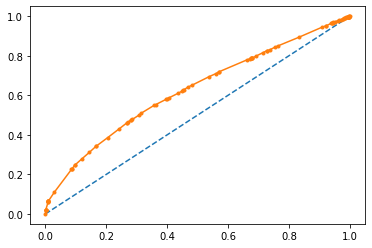

In [52]:
dt=DecisionTreeClassifier(criterion = "entropy", random_state = 100,
                               max_depth=8, min_samples_leaf=7)
r=trainModel(dt)
modelResuts=        pd.concat([modelResuts, r])


In [53]:
rfc = RandomForestClassifier() 

param_grid = { 
    'n_estimators': [100,200, 500]
   }


CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(x_train, np.ravel(y_train))
print(CV_rfc.best_params_)

{'n_estimators': 500}


Score : 0.5932820100348539
0.503 0.614 0.684 4128 6491
Method ['RandomForestClassifier'] Test_accuracy 0.59 Train_accuracy 0.59 MSE 0.41 auc 0.63 Precision 0.61 Recall 0.5 f1 0.55 Type1_error 4128 Type2_error 6491
AUC: 0.626


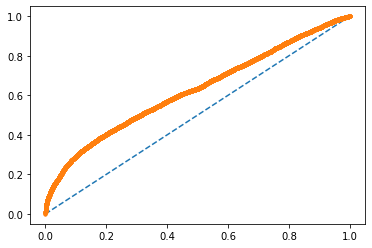

In [54]:
rf = RandomForestClassifier(n_estimators=500, max_depth=5, random_state=1)
r=trainModel(rf)
#results.append(r)
modelResuts=        pd.concat([modelResuts, r])



Score : 0.6225822513309587
0.546 0.645 0.699 3927 5927
Method ['AdaBoostClassifier'] Test_accuracy 0.62 Train_accuracy 0.62 MSE 0.38 auc 0.67 Precision 0.64 Recall 0.55 f1 0.59 Type1_error 3927 Type2_error 5927
AUC: 0.673


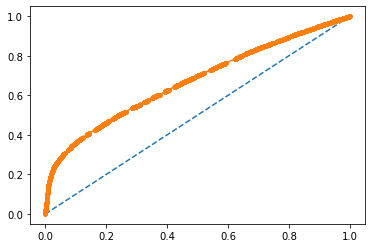

In [55]:
ac = AdaBoostClassifier()
rs=trainModel(ac)
modelResuts=        pd.concat([modelResuts, rs])

Score : 0.6266038530774829
0.52 0.661 0.734 3477 6272
Method ['GradientBoostingClassifier'] Test_accuracy 0.63 Train_accuracy 0.63 MSE 0.37 auc 0.68 Precision 0.66 Recall 0.52 f1 0.58 Type1_error 3477 Type2_error 6272
AUC: 0.676


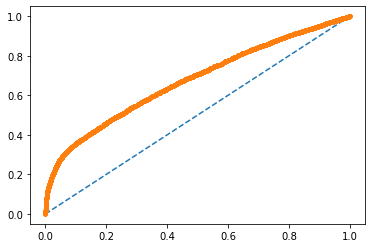

In [56]:
gc = GradientBoostingClassifier()
rs=trainModel(gc)
modelResuts=        pd.concat([modelResuts, rs])

[00:02:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Score : 0.654295453674978
0.513 0.715 0.796 2666 6360
Method ['XGBClassifier'] Test_accuracy 0.65 Train_accuracy 0.7 MSE 0.35 auc 0.7 Precision 0.72 Recall 0.51 f1 0.6 Type1_error 2666 Type2_error 6360
AUC: 0.703


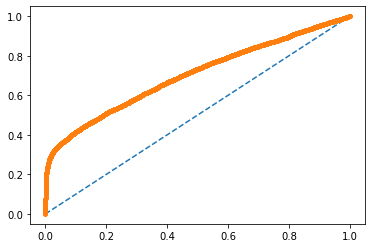

In [57]:
xgb_model = xgb.XGBClassifier()
rs=trainModel(xgb_model)
modelResuts=        pd.concat([modelResuts, rs])

Score : 0.6542571527059634
0.474 0.741 0.834 2163 6864
Method ['LogisticRegression'] Test_accuracy 0.65 Train_accuracy 0.66 MSE 0.35 auc 0.7 Precision 0.74 Recall 0.47 f1 0.58 Type1_error 2163 Type2_error 6864
AUC: 0.703


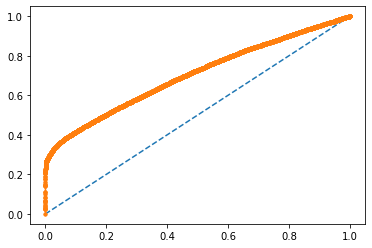

In [58]:
lr =  LogisticRegression(C=1)
rs=trainModel(lr)
modelResuts=        pd.concat([modelResuts, rs])

In [59]:
modelResuts

,Method,Test_accuracy,Train_accuracy,MSE,auc,Precision,Recall,f1,Type1_error,Type2_error
0,DecisionTreeClassifier,0.60,0.60,0.40,0.63,0.63,0.47,0.54,3655,6869
0,RandomForestClassifier,0.59,0.59,0.41,0.63,0.61,0.50,0.55,4128,6491
0,AdaBoostClassifier,0.62,0.62,0.38,0.67,0.64,0.55,0.59,3927,5927
0,GradientBoostingClassifier,0.63,0.63,0.37,0.68,0.66,0.52,0.58,3477,6272
0,XGBClassifier,0.65,0.70,0.35,0.70,0.72,0.51,0.60,2666,6360
0,LogisticRegression,0.65,0.66,0.35,0.70,0.74,0.47,0.58,2163,6864


In [60]:
modelResuts

,Method,Test_accuracy,Train_accuracy,MSE,auc,Precision,Recall,f1,Type1_error,Type2_error
0,DecisionTreeClassifier,0.60,0.60,0.40,0.63,0.63,0.47,0.54,3655,6869
0,RandomForestClassifier,0.59,0.59,0.41,0.63,0.61,0.50,0.55,4128,6491
0,AdaBoostClassifier,0.62,0.62,0.38,0.67,0.64,0.55,0.59,3927,5927
0,GradientBoostingClassifier,0.63,0.63,0.37,0.68,0.66,0.52,0.58,3477,6272
0,XGBClassifier,0.65,0.70,0.35,0.70,0.72,0.51,0.60,2666,6360
0,LogisticRegression,0.65,0.66,0.35,0.70,0.74,0.47,0.58,2163,6864


In [61]:
modelResuts

,Method,Test_accuracy,Train_accuracy,MSE,auc,Precision,Recall,f1,Type1_error,Type2_error
0,DecisionTreeClassifier,0.60,0.60,0.40,0.63,0.63,0.47,0.54,3655,6869
0,RandomForestClassifier,0.59,0.59,0.41,0.63,0.61,0.50,0.55,4128,6491
0,AdaBoostClassifier,0.62,0.62,0.38,0.67,0.64,0.55,0.59,3927,5927
0,GradientBoostingClassifier,0.63,0.63,0.37,0.68,0.66,0.52,0.58,3477,6272
0,XGBClassifier,0.65,0.70,0.35,0.70,0.72,0.51,0.60,2666,6360
0,LogisticRegression,0.65,0.66,0.35,0.70,0.74,0.47,0.58,2163,6864


In [62]:
dftest=pd.read_csv('test.csv')


In [63]:
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  42000 non-null  int64  
 1   year_of_poll        42000 non-null  int64  
 2   own_self_emp        42000 non-null  int64  
 3   veteran benefits    42000 non-null  int64  
 4   currently_enrolled  29387 non-null  object 
 5   race                42000 non-null  object 
 6   father_country      42000 non-null  object 
 7   educ                42000 non-null  object 
 8   house_stat          41997 non-null  object 
 9   major_ind_code      42000 non-null  object 
 10  labour_union        27663 non-null  object 
 11  self_country        42000 non-null  object 
 12  major_occ_code      20932 non-null  object 
 13  age                 41404 non-null  float64
 14  mother_country      42000 non-null  object 
 15  house_summary       42000 non-null  object 
 16  gend

In [64]:
dftest['own_self_emp']=dftest['own_self_emp'].astype('object')
dftest['veteran benefits']=dftest['veteran benefits'].astype('object')

In [65]:
for col in categoricalcols:
    df[col]=df[col].str.replace('+','plus')
    df[col]=df[col].str.replace('<','less')
    df[col]=df[col].str.replace('(','')
    df[col]=df[col].str.replace(')','')

In [66]:
dftest['age'].isnull().sum()

596

In [ ]:
#convertedtestdata=preprocessing_data(dftest)
dftest['age']=dftest['age'].fillna( 0)
convertedtestdata=removeNull(dftest)
   
    #convert all object features as categorical
convertedtestdata=convertCategoryfeature(convertedtestdata)
#Drop customer ID as it is not required
convertedtestdata=convertedtestdata.drop(['year_of_poll'],axis=1)
#encode categorical features
# data1=data.drop(['target'],axis=1)

convertedtestdata=OnehotEncoding(convertedtestdata)
cols=['ID','age', 'employer_of', 'weeks_worked', 'labour_union_no',
       'income_filled_ No', 'dividends',
       'currently_enrolled_College/University', 'gains',
       'currently_enrolled_ High school', 'gender_M', 'income_filled_ Yes',
       'labour_union_yes', 'hourly_wage', 'house_1yr_ago_ Yes', 'race_ White']

#convertedtestdata=convertedtestdata[cols]


In [ ]:
convertedtestdata.head()

In [ ]:
data=convertedtestdata.drop('ID',axis=1)
#minmax=MinMaxScaler()

testdata=pd.DataFrame(minmax.transform(data))
testdata.columns=data.columns

y_pred = lr.predict(data)

In [ ]:
testdata.head()

In [ ]:
res = pd.DataFrame(y_pred)
res.index = dftest['ID'] # its important for comparison
res.columns = ["income"]
res.to_csv("prediction_results.csv")